In [62]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols, glm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
#import the merged data set
HumanA= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
HumanA.dropna(axis=0, inplace=True)
HumanAf = HumanA[HumanA['ID'] != 4623]

In [64]:
# Define probability distribution for the response variable for the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

## Order effects

Text(0.5, 0, 'Residuals')

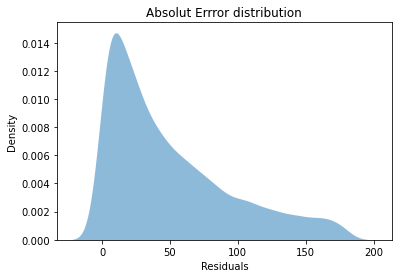

In [65]:
#Plotting KDE for first independent variable
ax = sns.kdeplot(x='AbsolutError', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Absolut Errror distribution")
ax.set_xlabel("Residuals")

Text(0.5, 0, 'Residuals')

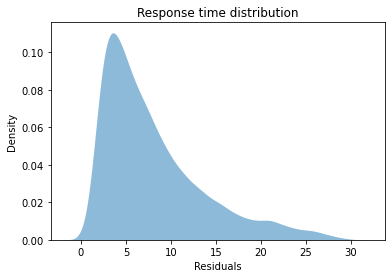

In [66]:
#Plotting KDE for second independent variable
ax = sns.kdeplot(x='RT', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Response time distribution")
ax.set_xlabel("Residuals")

In [67]:
# Response time predicted by trial order in each starting location
formula = 'np.log(RT) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                np.log(RT)
No. Observations:                8713                   Method:                            REML      
No. Groups:                      26                     Scale:                             0.3320    
Min. group size:                 329                    Log-Likelihood:                    -7643.6524
Max. group size:                 336                    Converged:                         Yes       
Mean group size:                 335.1                                                               
-----------------------------------------------------------------------------------------------------
                                                            Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------
Intercept   

Text(0.5, 17.200000000000003, 'Residuals')

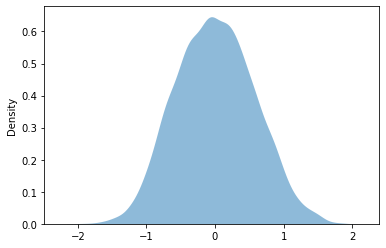

In [68]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

### CONCLUSION
__________________
Subjects are **significantly** slower on the first three trials in each pointing position.

In [ ]:
# Response time predicted by trial order in each starting location
formula = 'np.log(AbsolutError) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

### Result
__________________
Subjects do not significantly differ in their precision across time spent at pointing position.


In [ ]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [ ]:
# Response time predicted by trial order at the overall test
formula = 'np.log(AbsolutError) ~ C(StartPointID, Treatment(reference=14))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

### Result
__________________
Subjects are in average 1.5 seconds slower during  the first 10 trials


In [ ]:
# Response time predicted by trial order for the overall test
formula = 'RT ~ C(StartPointID, Treatment(reference=27))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

### Result
__________________
Subjects accuracy does not increase throughout the task


### CONCLUSION
__________________
Subjects accuracy does not improve through the task, but their responsable does. This could be evidence of a learning effect of the testing format that does not enhance their performance. Their knwoledge is stable throughout.

## The two factor interaction: Meaningfulness*Presence

In [ ]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]] = HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]].astype(int)
HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]] = HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]].values.astype(str)

In [ ]:
HumanAf["ID_StartPointID"] =str(HumanAf['ID']) + "_" + str(HumanAf['StartPointID'])


In [ ]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~  C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))  + C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))*C(Context, Treatment(reference=False))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID_StartPointID']).fit()
print(model_LM.summary())

In [ ]:
HumanAf["ID_PointingTaskStartingLocations"] = HumanAf.loc[:,"ID"] + "_" + HumanAf.loc[:,"PointingTaskStartingLocations"]

In [ ]:
HumanAf["ID_PointingTaskStartingLocations"].head()

In [ ]:
# Whithout global landmarks
HumanAfnoL = HumanAf[(HumanAf.avatarID != 27) | (HumanAf.avatarID != 28) | (HumanAf.avatarID != 55)| (HumanAf.avatarID != 56)]


In [ ]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID_PointingTaskStartingLocations']).fit()
print(model_LM.summary())

In [ ]:
from statsmodels.stats.anova import AnovaRM
print(AnovaRM(data=HumanAfnoL, depvar='RT', subject='ID', within=['Context', 'AvatarPresenceCategory'], aggregate_func = 'mean').fit())

In [ ]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [ ]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
# Response time predicted Avatar Category + Location
formula = "AbsolutError ~ avatarID + C(Context, Treatment(reference=False)) + avatarID:C(Context, Treatment(reference=False))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
HumanAf.groupby('Context')['AbsolutError'].median()

In [ ]:
HumanAf.groupby(['Context'])['RT'].std()

In [ ]:
# Absolut error predicted by location
formula = "np.log(AbsolutError) ~ C(avatarID)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

## FRS questionnaire analysis

In [ ]:
# Absolut error predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
X = HumanAf[['Context', 'AvatarPresenceCategory']]

y = HumanAf['AbsolutError']

## fit a OLS model with intercept on FRS subscales
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

In [ ]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(est.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for log response times")
ax.set_xlabel("Residuals")

In [ ]:
# Absolut error predicted by FRS
formula = "AbsolutError ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for  log transform of absolut error")
ax.set_xlabel("Residuals")

In [ ]:
# Response Time predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

## Avatar questionnaire analysis

In [ ]:
# Response time predicted by Avatar Presence



In [ ]:
# Isolating the avatar Quest variables for correlation
HumanAavatarQ = HumanAf[['remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert' ]]

In [ ]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

fig, ax = plt.subplots(nrows=1,ncols=2)

#Calculates pearsons r matrix
corrMatrix = HumanAavatarQ.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])

for ax in ax.ravel():
    ax.set_xticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=80);
    ax.set_yticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=360);
plt.tight_layout()
plt.show()

In [ ]:
stats.spearmanr(HumanAavatarQ.remember_standing_likert, HumanAavatarQ.remember_action_likert)


In [ ]:
HumanAavatarQ.head()

## Calculating a factorial analysis on the questionnaire

In [ ]:
AvatarQuest= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/AvatarQuestcsv.csv')
AvatarQuest.drop('Unnamed: 0', axis=1, inplace=True)
AvatarQuest.head()

In [ ]:
b = list(range(1,57))
Attractive= AvatarQuest.iloc[: , b].copy()
Attractive.info()

In [ ]:
sns.set(rc={"figure.figsize":(36, 36)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

fig, ax = plt.subplots(nrows=2,ncols=1)

#Calculates pearsons r matrix
corrMatrix = Attractive.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])
plt.tight_layout()
plt.show()

In [ ]:
corrMatrix.T

In [ ]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Droppin Nas
HumanAavatarQ.dropna(inplace=True);

#Adecuacy test

#Barlets sphericity: A significative p value indicates the date is different from an identity matrix
chi_square_value,p_value= calculate_bartlett_sphericity(HumanAavatarQ)
print(chi_square_value,p_value)

# Kaiser-Meyer-Olkin (KMO): Estimates the proportion of variance among all observed variables, less than 0.6 is inadequate
kmo_all,kmo_model=calculate_kmo(HumanAavatarQ)
print(kmo_model)
#Create factor analysis object and perform analysis
fa= FactorAnalyzer(rotation='varimax')
fa.fit(HumanAavatarQ)

loadings = fa.loadings_

# Get the eigenvector
ev, v = fa.get_eigenvalues()

xvals = range(1, HumanAavatarQ.shape[1]+1)
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ remember_action_likert + remember_standing_likert  + attractive_action_likert + attractive_standing_likert + realistic_action_likert + realistic_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
import random
number = random.randint(1000,9999)
print(number)

In [ ]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ ContextQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
# Response time predicted by Avatar Presence
formula = "remember_action_likert ~ AffiliativeQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
HumanAaffili = HumanAf[['AffiliativeQ_average', 'remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert','ContextQ_average' ]]
corrMatrix = HumanAaffili.corr()

fig, ax = plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", ax=ax, mask=mask)

ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);
ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);

In [ ]:
sns.regplot('remember_action_likert', 'AffiliativeQ_average', data= HumanAaffili )

In [ ]:
sns.regplot('realistic_standing_likert', 'AffiliativeQ_average', data= HumanAaffili )

In [ ]:
import scipy.stats
r, p = scipy.stats.pearsonr(HumanAf.AffiliativeQ_average, HumanAf.realistic_standing_likert)
p

In [ ]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm

fig, ax = plt.subplots(1,2)

cor, pval = stats.spearmanr(corrMatrix.T)
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")

for ax in ax.ravel():
    ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=60);
    ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=360);
plt.tight_layout()
plt.show()

In [ ]:
HumanAf.info()

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# with regression
sns.pairplot(HumanAaffili, kind="reg")
plt.show()